In [1]:
import numpy as np
import pandas as pd
import os
from Bonds import Bonds, get_log_yield, get_log_forward, eigen_decomposition
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
data_dir = "data/final"
data = {}
for root, dirs, files in os.walk(data_dir):
    if files:
        for file in files:
            df = pd.read_csv(os.path.join(root, file))
            start_date = pd.to_datetime(file.split('.')[0], format="mixed")
            bonds = Bonds(df, start_date)
            data[start_date] = bonds

D:\Assignment\MAT1856\Assignment\Assignment 1\Bonds.py:104: RuntimeWarning: divide by zero encountered in scalar divide
  self._yield[self.zero_coupon.maturity_months] = 12 * np.log(
D:\Assignment\MAT1856\Assignment\Assignment 1\Bonds.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  return yield_1 + (time - time_1) * ((yield_2 - yield_1) / (time_2 - time_1))
D:\Assignment\MAT1856\Assignment\Assignment 1\Bonds.py:104: RuntimeWarning: divide by zero encountered in scalar divide
  self._yield[self.zero_coupon.maturity_months] = 12 * np.log(
D:\Assignment\MAT1856\Assignment\Assignment 1\Bonds.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  return yield_1 + (time - time_1) * ((yield_2 - yield_1) / (time_2 - time_1))
D:\Assignment\MAT1856\Assignment\Assignment 1\Bonds.py:104: RuntimeWarning: divide by zero encountered in scalar divide
  self._yield[self.zero_coupon.maturity_months] = 12 * np.log(
D:\Assignment\MAT1856\Assignment\Assignment 1\Bonds.p

[]

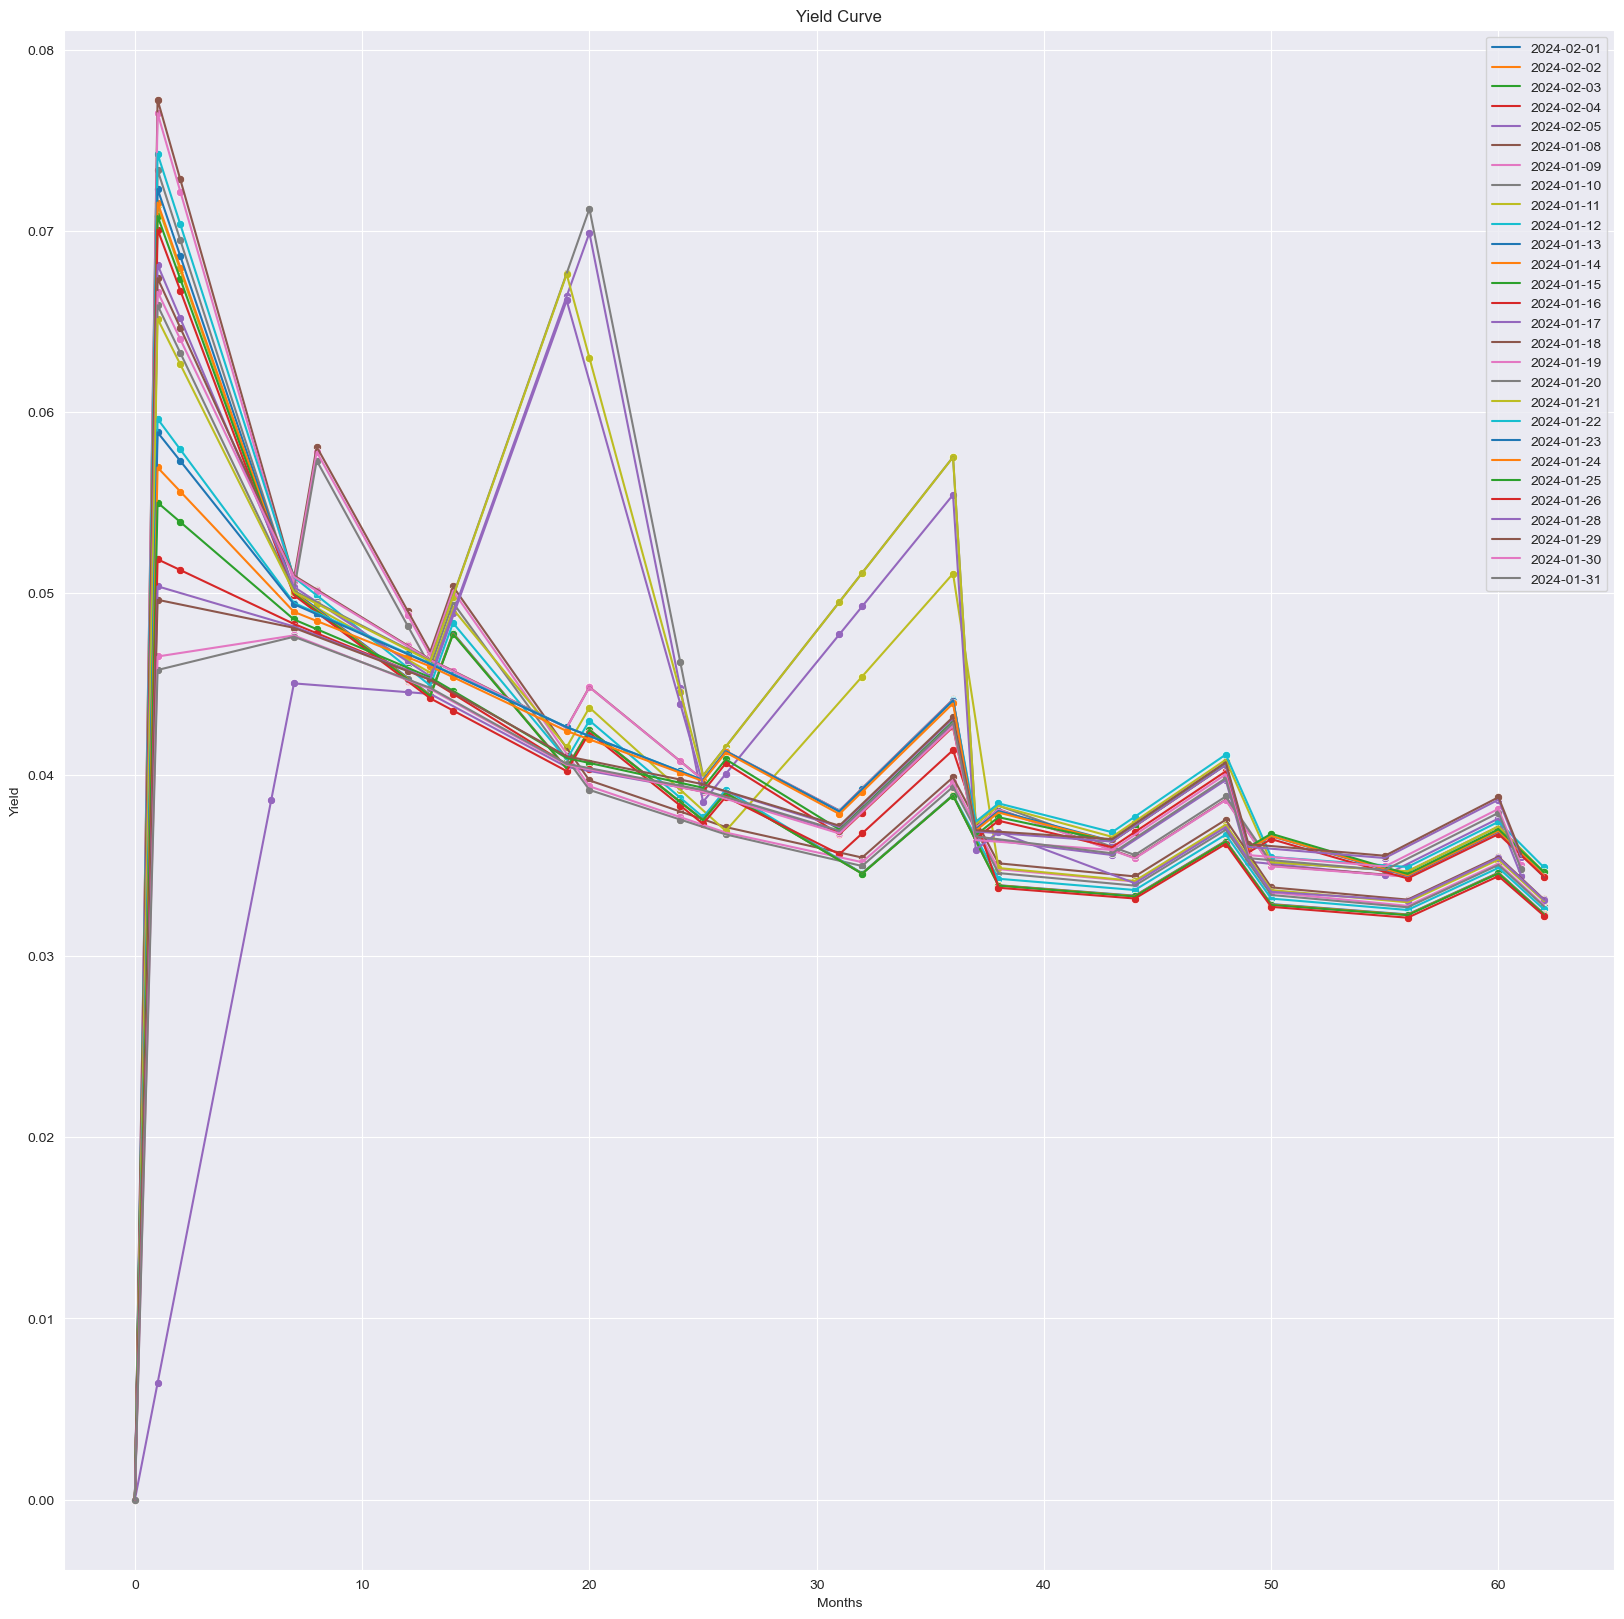

In [3]:
plt.figure(figsize=(20,20))
for date in data:
    _yields = data[date]._yield
    sns.scatterplot(x=_yields.keys(), y=_yields.values())
    sns.lineplot(x=_yields.keys(), y=_yields.values(), label=f"{pd.to_datetime(date, format='mixed').strftime('%Y-%m-%d')}")
plt.title("Yield Curve")
plt.xlabel("Months")
plt.ylabel("Yield")
plt.plot()

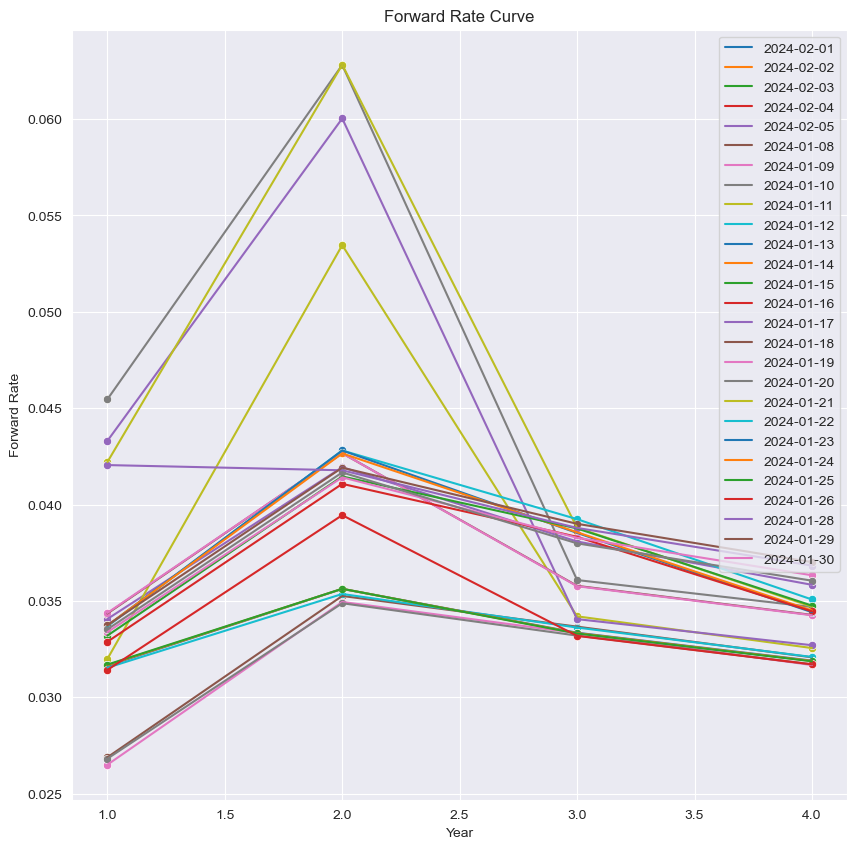

In [4]:
plt.figure(figsize=(10,10))
for date, bonds in data.items():
    x = []
    y = []
    for key, value in bonds.forward_rates.items():
        y.append(value)
        x.append(key[1]/12 - 1)
        if value < 0:
            print(date)
    # data = {"x":x, "y":y}
    sns.scatterplot(data=data, x=x, y=y)
    plt.plot(x, y, label=f"{pd.to_datetime(date, format='mixed').strftime('%Y-%m-%d')}")         
plt.title("Forward Rate Curve")
plt.xlabel("Year")
plt.ylabel("Forward Rate")
plt.show()

In [5]:
data = dict(sorted(data.items(), key=lambda item: item[0]))

Bond:CA135087J967, YTM:0.13631761651502275
Bond:CA135087K528, YTM:0.13067675847812987
Bond:CA135087K940, YTM:0.10200937515400277
Bond:CA135087L518, YTM:0.08167585446635085
Bond:CA135087L930, YTM:0.12368344141156651
Bond:CA135087M847, YTM:0.13067675847812987
Bond:CA135087N837, YTM:0.1540612640315881
Bond:CA135087P576, YTM:0.1604792692249068
Bond:CA135087Q491, YTM:0.1585548631125976
Bond:CA135087Q988, YTM:0.16383164956088037
Bond:CA135087J967, YTM:0.13631761651502275
Bond:CA135087K528, YTM:0.13067675847812987
Bond:CA135087K940, YTM:0.10200937515400277
Bond:CA135087L518, YTM:0.08167585446635085
Bond:CA135087L930, YTM:0.12368344141156651
Bond:CA135087M847, YTM:0.13067675847812987
Bond:CA135087N837, YTM:0.1540612640315881
Bond:CA135087P576, YTM:0.1604792692249068
Bond:CA135087Q491, YTM:0.1585548631125976
Bond:CA135087Q988, YTM:0.16383164956088037
Bond:CA135087J967, YTM:0.13631761651502275
Bond:CA135087K528, YTM:0.13067675847812987
Bond:CA135087K940, YTM:0.10200937515400277
Bond:CA135087L518

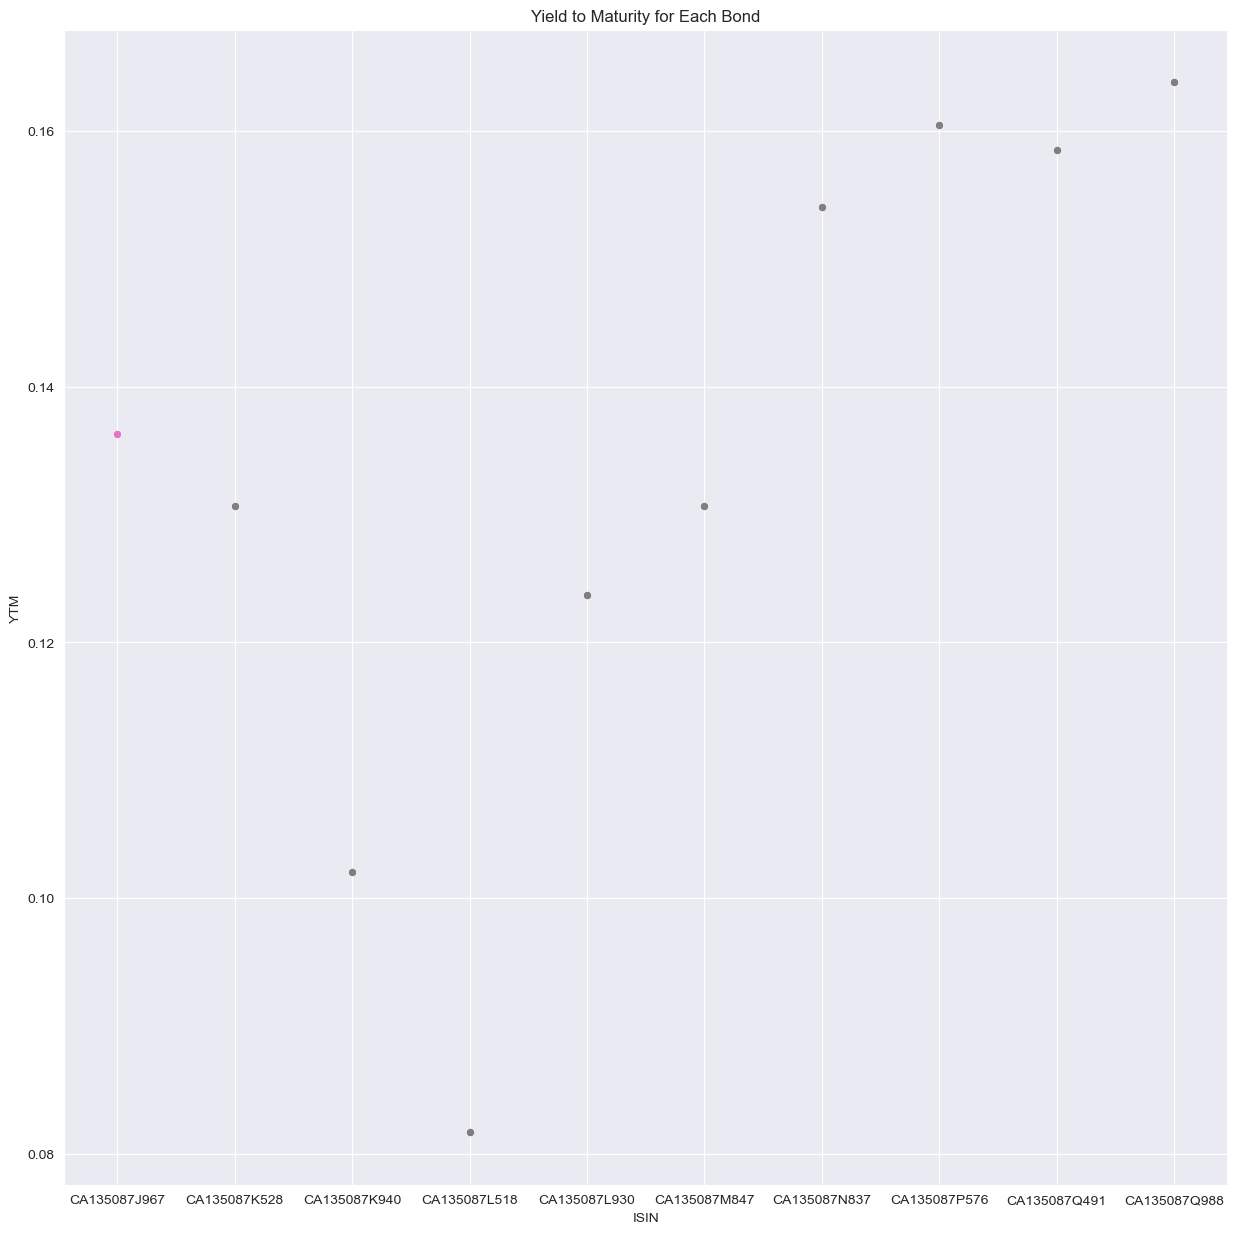

In [6]:
plt.figure(figsize=(15,15))
for date, bonds in data.items():
    bonds.get_bond_ytm()
    df = bonds.get_bonds_dataframe()
    sns.scatterplot(data=df, x="ISIN", y="Yield to Maturity")
plt.title("Yield to Maturity for Each Bond")
plt.xlabel("ISIN")
plt.ylabel("YTM")
plt.show()

In [7]:
required_data = 7
required_bonds = list(data.keys())[required_data:required_data + 10]

In [8]:
required_bonds

[Timestamp('2024-01-15 00:00:00'),
 Timestamp('2024-01-16 00:00:00'),
 Timestamp('2024-01-17 00:00:00'),
 Timestamp('2024-01-18 00:00:00'),
 Timestamp('2024-01-19 00:00:00'),
 Timestamp('2024-01-20 00:00:00'),
 Timestamp('2024-01-21 00:00:00'),
 Timestamp('2024-01-22 00:00:00'),
 Timestamp('2024-01-23 00:00:00'),
 Timestamp('2024-01-24 00:00:00')]

In [9]:
required_bonds = {k:data[k] for k in required_bonds}

In [10]:
required_bonds

{Timestamp('2024-01-15 00:00:00'): <Bonds.Bonds at 0x224ab942e10>,
 Timestamp('2024-01-16 00:00:00'): <Bonds.Bonds at 0x224ab943ed0>,
 Timestamp('2024-01-17 00:00:00'): <Bonds.Bonds at 0x224ab942690>,
 Timestamp('2024-01-18 00:00:00'): <Bonds.Bonds at 0x224ab92d6d0>,
 Timestamp('2024-01-19 00:00:00'): <Bonds.Bonds at 0x224ab92df50>,
 Timestamp('2024-01-20 00:00:00'): <Bonds.Bonds at 0x224ab92f110>,
 Timestamp('2024-01-21 00:00:00'): <Bonds.Bonds at 0x224ab91ded0>,
 Timestamp('2024-01-22 00:00:00'): <Bonds.Bonds at 0x224ab949710>,
 Timestamp('2024-01-23 00:00:00'): <Bonds.Bonds at 0x224ab941d10>,
 Timestamp('2024-01-24 00:00:00'): <Bonds.Bonds at 0x224ab94a090>}

In [11]:
log_yield_cov = get_log_yield(required_bonds)

In [12]:
log_yield_cov

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.00010098,  0.000215  ,  0.00028019,  0.00011104,
         0.        ],
       [ 0.        ,  0.000215  ,  0.00678755,  0.01414228, -0.00024154,
         0.        ],
       [ 0.        ,  0.00028019,  0.01414228,  0.03119475, -0.00041666,
         0.        ],
       [ 0.        ,  0.00011104, -0.00024154, -0.00041666,  0.00042992,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [13]:
yield_eigenval, yield_eigenvec = eigen_decomposition(log_yield_cov)

In [14]:
yield_eigenval[0], yield_eigenvec[0]

(0.03768016375281064, array([0., 0., 0., 0., 1., 0.]))

In [15]:
log_forward_cov = get_log_forward(required_bonds)

In [16]:
log_forward_cov

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.23081740e-02,  4.51547797e-02,
        -1.05977369e-03, -4.71103991e-05,  0.00000000e+00],
       [ 0.00000000e+00,  4.51547797e-02,  6.63105996e-02,
        -1.11085234e-03, -4.80601682e-04,  0.00000000e+00],
       [ 0.00000000e+00, -1.05977369e-03, -1.11085234e-03,
         7.53595391e-04,  2.87602014e-04,  0.00000000e+00],
       [ 0.00000000e+00, -4.71103991e-05, -4.80601682e-04,
         2.87602014e-04,  3.53243911e-04,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [17]:
forward_eigenval, forward_eigenvec = eigen_decomposition(log_forward_cov)

In [18]:
forward_eigenval[0], forward_eigenvec[0]

(0.09758431330106278, array([0., 0., 0., 0., 1., 0.]))

In [19]:
explained_variance = forward_eigenval[0] / sum(forward_eigenval)

In [20]:
explained_variance

0.9785280878339777